In [1]:
from elsapy.elsclient import ElsClient
from elsapy.elssearch import ElsSearch
from elsapy.elsprofile import ElsAuthor
from elsapy.elsdoc import FullDoc
from elsapy.elsdoc import AbsDoc
import json
import pandas as pd

In [2]:
# Initialize the Scopus client
client = ElsClient(api_key="737506d5b1185510c2c6a0f9f31f983f")  # Replace 'your_api_key_here' with your actual API key

In [3]:
# Define the search query
search_query = ElsSearch(query='TITLE-ABS-KEY("Covid-19")', index='scopus')

In [4]:
# Execute the search
search_query.execute(client)

In [5]:
# Function to perform a search and handle pagination
def fetch_all_results(client, query, max_results=100):
    all_results = []
    start = 0
    count = 25  # Number of results per page (Scopus API default limit)

    while start < max_results:
        search_query = ElsSearch(query=query, index='scopus')
        search_query.execute(client, count=count)

        if not search_query.results:
            break

        all_results.extend(search_query.results)
        start += count

        # Check if the last batch of results is less than the count, meaning we've reached the end
        if len(search_query.results) < count:
            break

    return all_results

In [6]:
# List of topics to search for
topics = [
    'artificial intelligence',
    'machine learning',
    'data science',
    'natural language processing',
    'computer vision'
]

In [7]:
# Initialize a list to store the publication data
publications = []

In [8]:
# Fetch results for each topic
for topic in topics:
    query = f'TITLE-ABS-KEY("{topic}")'
    results = fetch_all_results(client, query)

    if results:
        for entry in results:
            title = entry.get('dc:title', 'No title available')
            authors = entry.get('dc:creator', 'No authors available')
            publication = entry.get('prism:publicationName', 'No publication name available')
            date = entry.get('prism:coverDate', 'No date available')
            citations = entry.get('citedby-count', 'No citations available')

            # Append the publication data to the list
            publications.append({
                'Topic': topic,
                'Title': title,
                'Authors': authors,
                'Publication': publication,
                'Date': date,
                'Citations': citations
            })

In [9]:
# Create a DataFrame from the publications list
df = pd.DataFrame(publications)

In [10]:
# Save the DataFrame to a CSV file
df.to_csv('data/scopus_publications_multiple_topics.csv', index=False)
print("Results saved to scopus_publications_multiple_topics.csv")

Results saved to scopus_publications_multiple_topics.csv


In [11]:
# Convertir la colonne 'Date' en datetime pour faciliter l'analyse
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# S'assurer que 'Citations' est de type int pour les opérations de somme
df['Citations'] = pd.to_numeric(df['Citations'], errors='coerce').fillna(0).astype(int)

In [13]:
df.head()

,Topic,Title,Authors,Publication,Date,Citations
0,artificial intelligence,Perspectives on label-free microscopy of heter...,Pham D.L.,Journal of biomedical optics,2025-12-01,0
1,artificial intelligence,Autoencoder-based image denoiser suitable for ...,Maghraby M.,Journal of Advanced Research in Applied Scienc...,2025-03-01,0
2,artificial intelligence,An Artificial Intelligence Approach to Monitor...,Haron N.H.,Journal of Advanced Research in Applied Scienc...,2025-02-01,0
3,artificial intelligence,Efficient and easily recyclable photocatalytic...,Liang Y.,Separation and Purification Technology,2025-01-01,0
4,artificial intelligence,Modified Levey-Jennings Chart with Robust Esti...,Dahari S.,Journal of Advanced Research in Applied Scienc...,2025-01-01,0


In [14]:
df.tail()

,Topic,Title,Authors,Publication,Date,Citations
495,computer vision,A modular motion compensation pipeline for pro...,Wampl S.,Scientific Reports,2024-12-01,0
496,computer vision,Web-based diagnostic platform for microorganis...,Liu C.,Heritage Science,2024-12-01,0
497,computer vision,An STS analysis of a digital humanities collab...,Láng B.,Humanities and Social Sciences Communications,2024-12-01,0
498,computer vision,Computer vision models enable mixed linear mod...,Zhang S.,Scientific Reports,2024-12-01,0
499,computer vision,Ηand dexterities assessment in stroke patients...,Papagiannis G.,Scientific Reports,2024-12-01,0


In [3]:
# Calculer le nombre total de citations pour chaque publication
total_citations = df.groupby('Topic')['Citations'].sum().reset_index()
total_citations.rename(columns={'Citations': 'Total Cited'}, inplace=True)
total_citations

NameError: name 'df' is not defined

In [41]:
# Analyser la répartition des publications par année
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
publications_per_year = df.groupby('Year').size().reset_index(name="Publications")
publications_per_year

,Year,Publications
0,2024,328
1,2025,172


In [18]:
#Calculate statistics like the mean, median, minimum, and maximum citations to understand the citation impact of publications.
citation_statistics = { 'Mean Citations': df['Citations'].mean(),
    'Median Citations': df['Citations'].median(),
    'Min Citations': df['Citations'].min(),
    'Max Citations': df['Citations'].max() }

In [25]:
#Identify the publications with the highest citations.
top_publications = df.sort_values(by="Citations",ascending=False).head(10)
top_publications

,Topic,Title,Authors,Publication,Date,Citations,Year
163,machine learning,Spatial differentiation of carbon emissions fr...,Cao H.,Journal of Environmental Sciences (China),2025-03-01,3,2025
188,machine learning,Spatial differentiation of carbon emissions fr...,Cao H.,Journal of Environmental Sciences (China),2025-03-01,3,2025
138,machine learning,Spatial differentiation of carbon emissions fr...,Cao H.,Journal of Environmental Sciences (China),2025-03-01,3,2025
113,machine learning,Spatial differentiation of carbon emissions fr...,Cao H.,Journal of Environmental Sciences (China),2025-03-01,3,2025
60,artificial intelligence,Diabetes and its associated factors: A Retrosp...,Amin F.,Pakistan Journal of Medical Sciences,2024-12-05,2,2024
10,artificial intelligence,Diabetes and its associated factors: A Retrosp...,Amin F.,Pakistan Journal of Medical Sciences,2024-12-05,2,2024
35,artificial intelligence,Diabetes and its associated factors: A Retrosp...,Amin F.,Pakistan Journal of Medical Sciences,2024-12-05,2,2024
85,artificial intelligence,Diabetes and its associated factors: A Retrosp...,Amin F.,Pakistan Journal of Medical Sciences,2024-12-05,2,2024
33,artificial intelligence,Optimizing Eriochrome Black T adsorption throu...,Bouzid T.,Separation and Purification Technology,2024-12-24,1,2024
34,artificial intelligence,AI-Enhanced Teaching Materials for Education: ...,Syahrizal S.,International Journal of Religion,2024-12-10,1,2024


In [27]:
#Analyze the distribution of publications by authors. This can help in understanding collaboration patterns.
publications_per_author = df.groupby('Authors').size().reset_index(name='Publications')
publications_per_author

,Authors,Publications
0,Abdelsamie M.M.,4
1,Abdul Kader M.M.M.,4
2,Abedian Kalkhoran H.,4
3,Amin F.,4
4,Ang Y.,4
...,...,...
113,Zhang S.,4
114,Zhang Z.,4
115,Zhong H.,4
116,Zulkifli N.D.,4


In [30]:
#Examine the distribution of publications across different topics to see which areas are most researched.
publications_per_topic = df.groupby('Topic').size().reset_index(name='Publications')
publications_per_topic

,Topic,Publications
0,artificial intelligence,100
1,computer vision,100
2,data science,100
3,machine learning,100
4,natural language processing,100


In [31]:
#Analyze how publications in each topic have changed over the years.
publications_per_topic_year = df.groupby(['Topic', 'Year'])size().reset_index(name='Publications')
publications_per_topic_year

,Topic,Year,Publications
0,artificial intelligence,2024,72
1,artificial intelligence,2025,28
2,computer vision,2024,80
3,computer vision,2025,20
4,data science,2024,88
5,data science,2025,12
6,machine learning,2025,100
7,natural language processing,2024,88
8,natural language processing,2025,12


In [47]:
# Total citations per topic
total_citations = df.groupby('Topic')['Citations'].sum().reset_index()
total_citations.rename(columns={'Citations': 'Total Cited'}, inplace=True)
total_citations

,Topic,Total Cited
0,artificial intelligence,16
1,computer vision,4
2,data science,0
3,machine learning,16
4,natural language processing,0


## Visualization

In [33]:
#Visualize the data to better understand the trends and distributions.
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Set up the visual style
sns.set(style="whitegrid")

C:\Users\lamaachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lamaachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


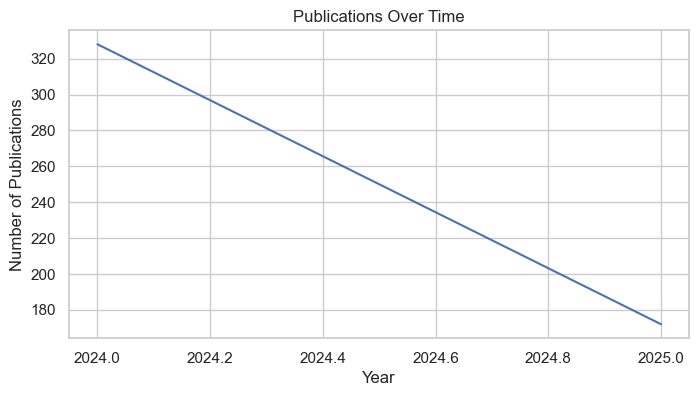

In [43]:
# Publications per year
plt.figure(figsize=(8, 4))
sns.lineplot(data=publications_per_year, x='Year', y='Publications')
plt.title('Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

C:\Users\lamaachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


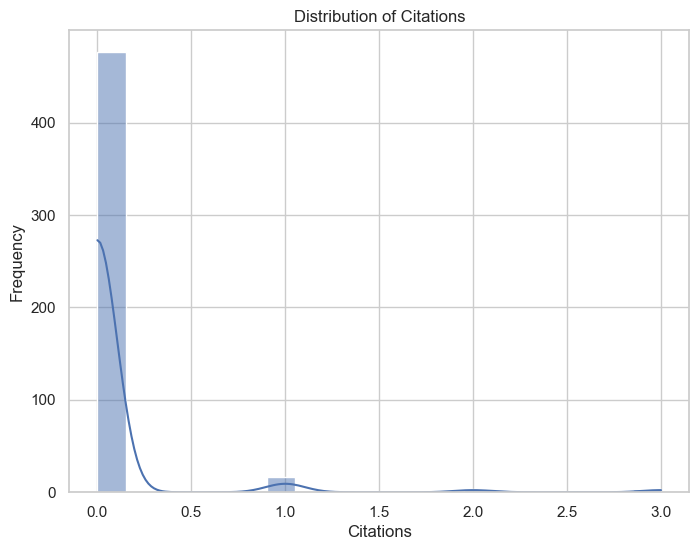

In [44]:
# Citations statistics
plt.figure(figsize=(8, 6))
sns.histplot(df['Citations'], bins=20, kde=True)
plt.title('Distribution of Citations')
plt.xlabel('Citations')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

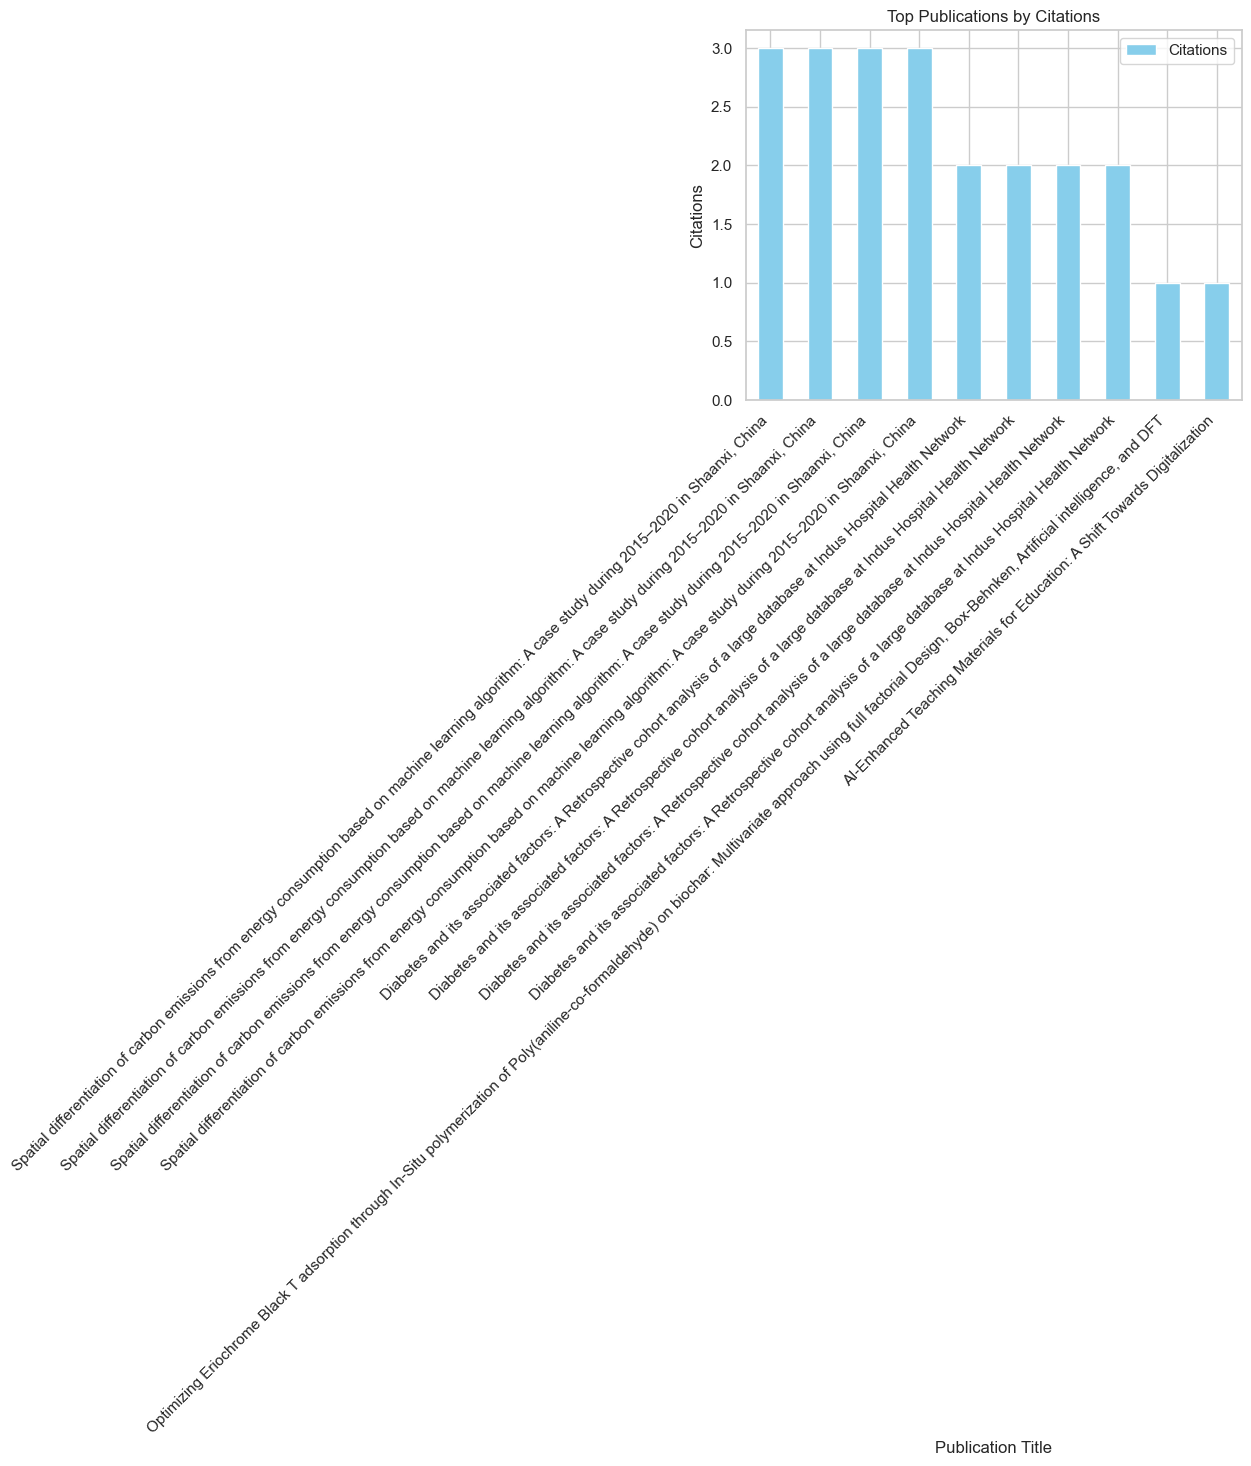

In [45]:
# Top publications by citations
plt.figure(figsize=(12, 8))
top_publications.plot(kind='bar', x='Title', y='Citations', color='skyblue')
plt.title('Top Publications by Citations')
plt.xlabel('Publication Title')
plt.ylabel('Citations')
plt.xticks(rotation=45, ha="right")
plt.show()

## Script to Fetch Data Using DOIs

In [19]:
# List of DOIs to fetch data for
# dois = [
#     '10.1016/j.artint.2019.07.004',
#     '10.1016/j.knosys.2018.04.045',
#     '10.1109/TIT.2021.3083294',
#     '10.1000/abc123',
    
#     # Add more DOIs as needed
# ]

In [20]:
# Initialize a list to store the publication data
# publications = []

In [21]:
# Fetch data for each DOI
# for doi in dois:
#     doc_srch = FullDoc(doi = doi)
#     if doc_srch.read(client):
#         title = doc_srch.data.get('dc:title', 'No title available')
#         authors = doc_srch.data.get('dc:creator', 'No authors available')
#         publication = doc_srch.data.get('prism:publicationName', 'No publication name available')
#         date = doc_srch.data.get('prism:coverDate', 'No date available')
#         citations = doc_srch.data.get('citedby-count', 'No citations available')

#         # Append the publication data to the list
#         publications.append({
#             'DOI': doi,
#             'Title': title,
#             'Authors': authors,
#             'Publication': publication,
#             'Date': date,
#             'Citations': citations
#         })
#     else:
#         print(f"Failed to retrieve data for DOI: {doi}")

In [22]:
# Create a DataFrame from the publications list
# df_DOIS= pd.DataFrame(publications)

In [23]:
# Save the DataFrame to a CSV file
# df_DOIS.to_csv('scopus_publications_by_doi.csv', index=False)
# print("Results saved to scopus_publications_by_doi.csv")